# Feed Forward (FF)

Au lieu de faire du feature engineering, on va améliorer notre modèle en ajoutant d'autres neurones à l'intérieur. L'idée est de laisser la machine apprendre à faire son propre **feature engineering**, en lui allouant des neurones dédiés à cela.

## Import

In [1]:
from IPython.display import Image

# Théorie

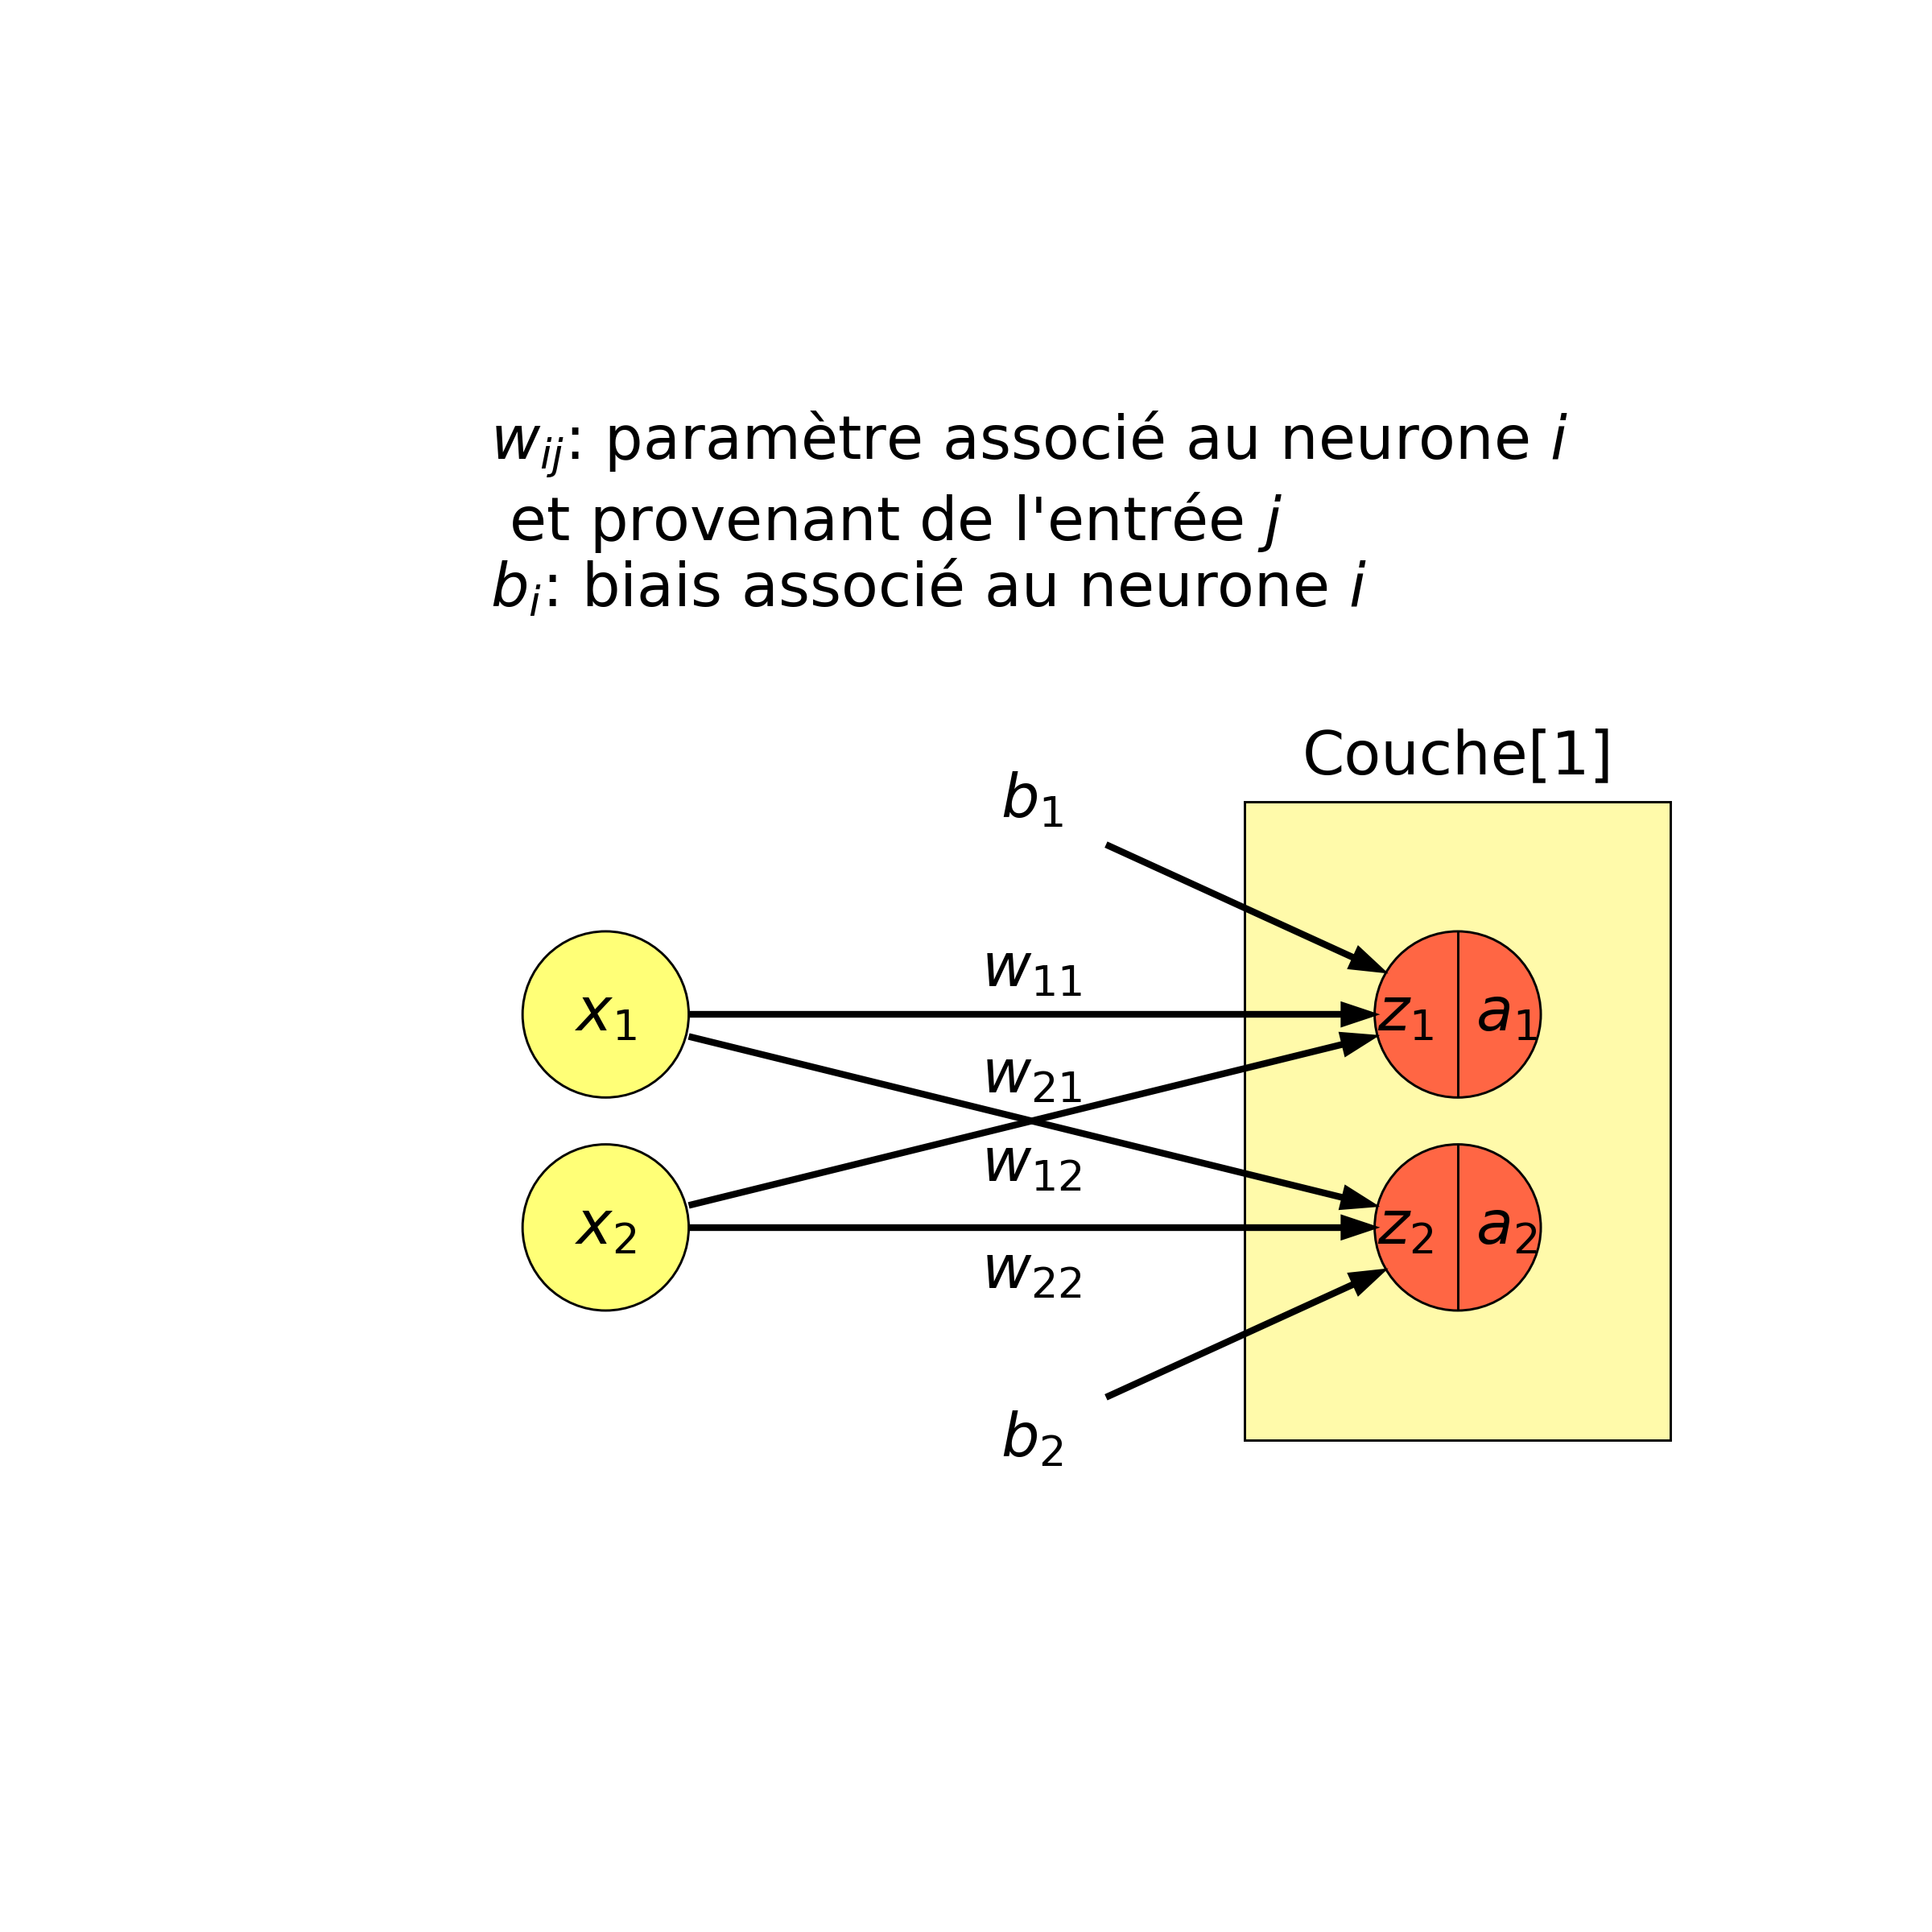

In [2]:
Image(filename='../../Viznet/FeedForward.png', width = 500)

$z_1 = w_{11}x_1 + w_{12}x_2+b_1$  
$a_1 = \frac{1}{1+\exp^{-z_1}}$  
  
$z_2 = w_{21}x_1 + w_{22}x_2+b_2$  
$a_2 = \frac{1}{1+\exp^{-z_2}}$  

On peux rajouter autant de neurones que l'on souhaite dans la couche 1. Cela permet d'augmenter la puissance du réseau cependant cela ralentis l'entrainement.

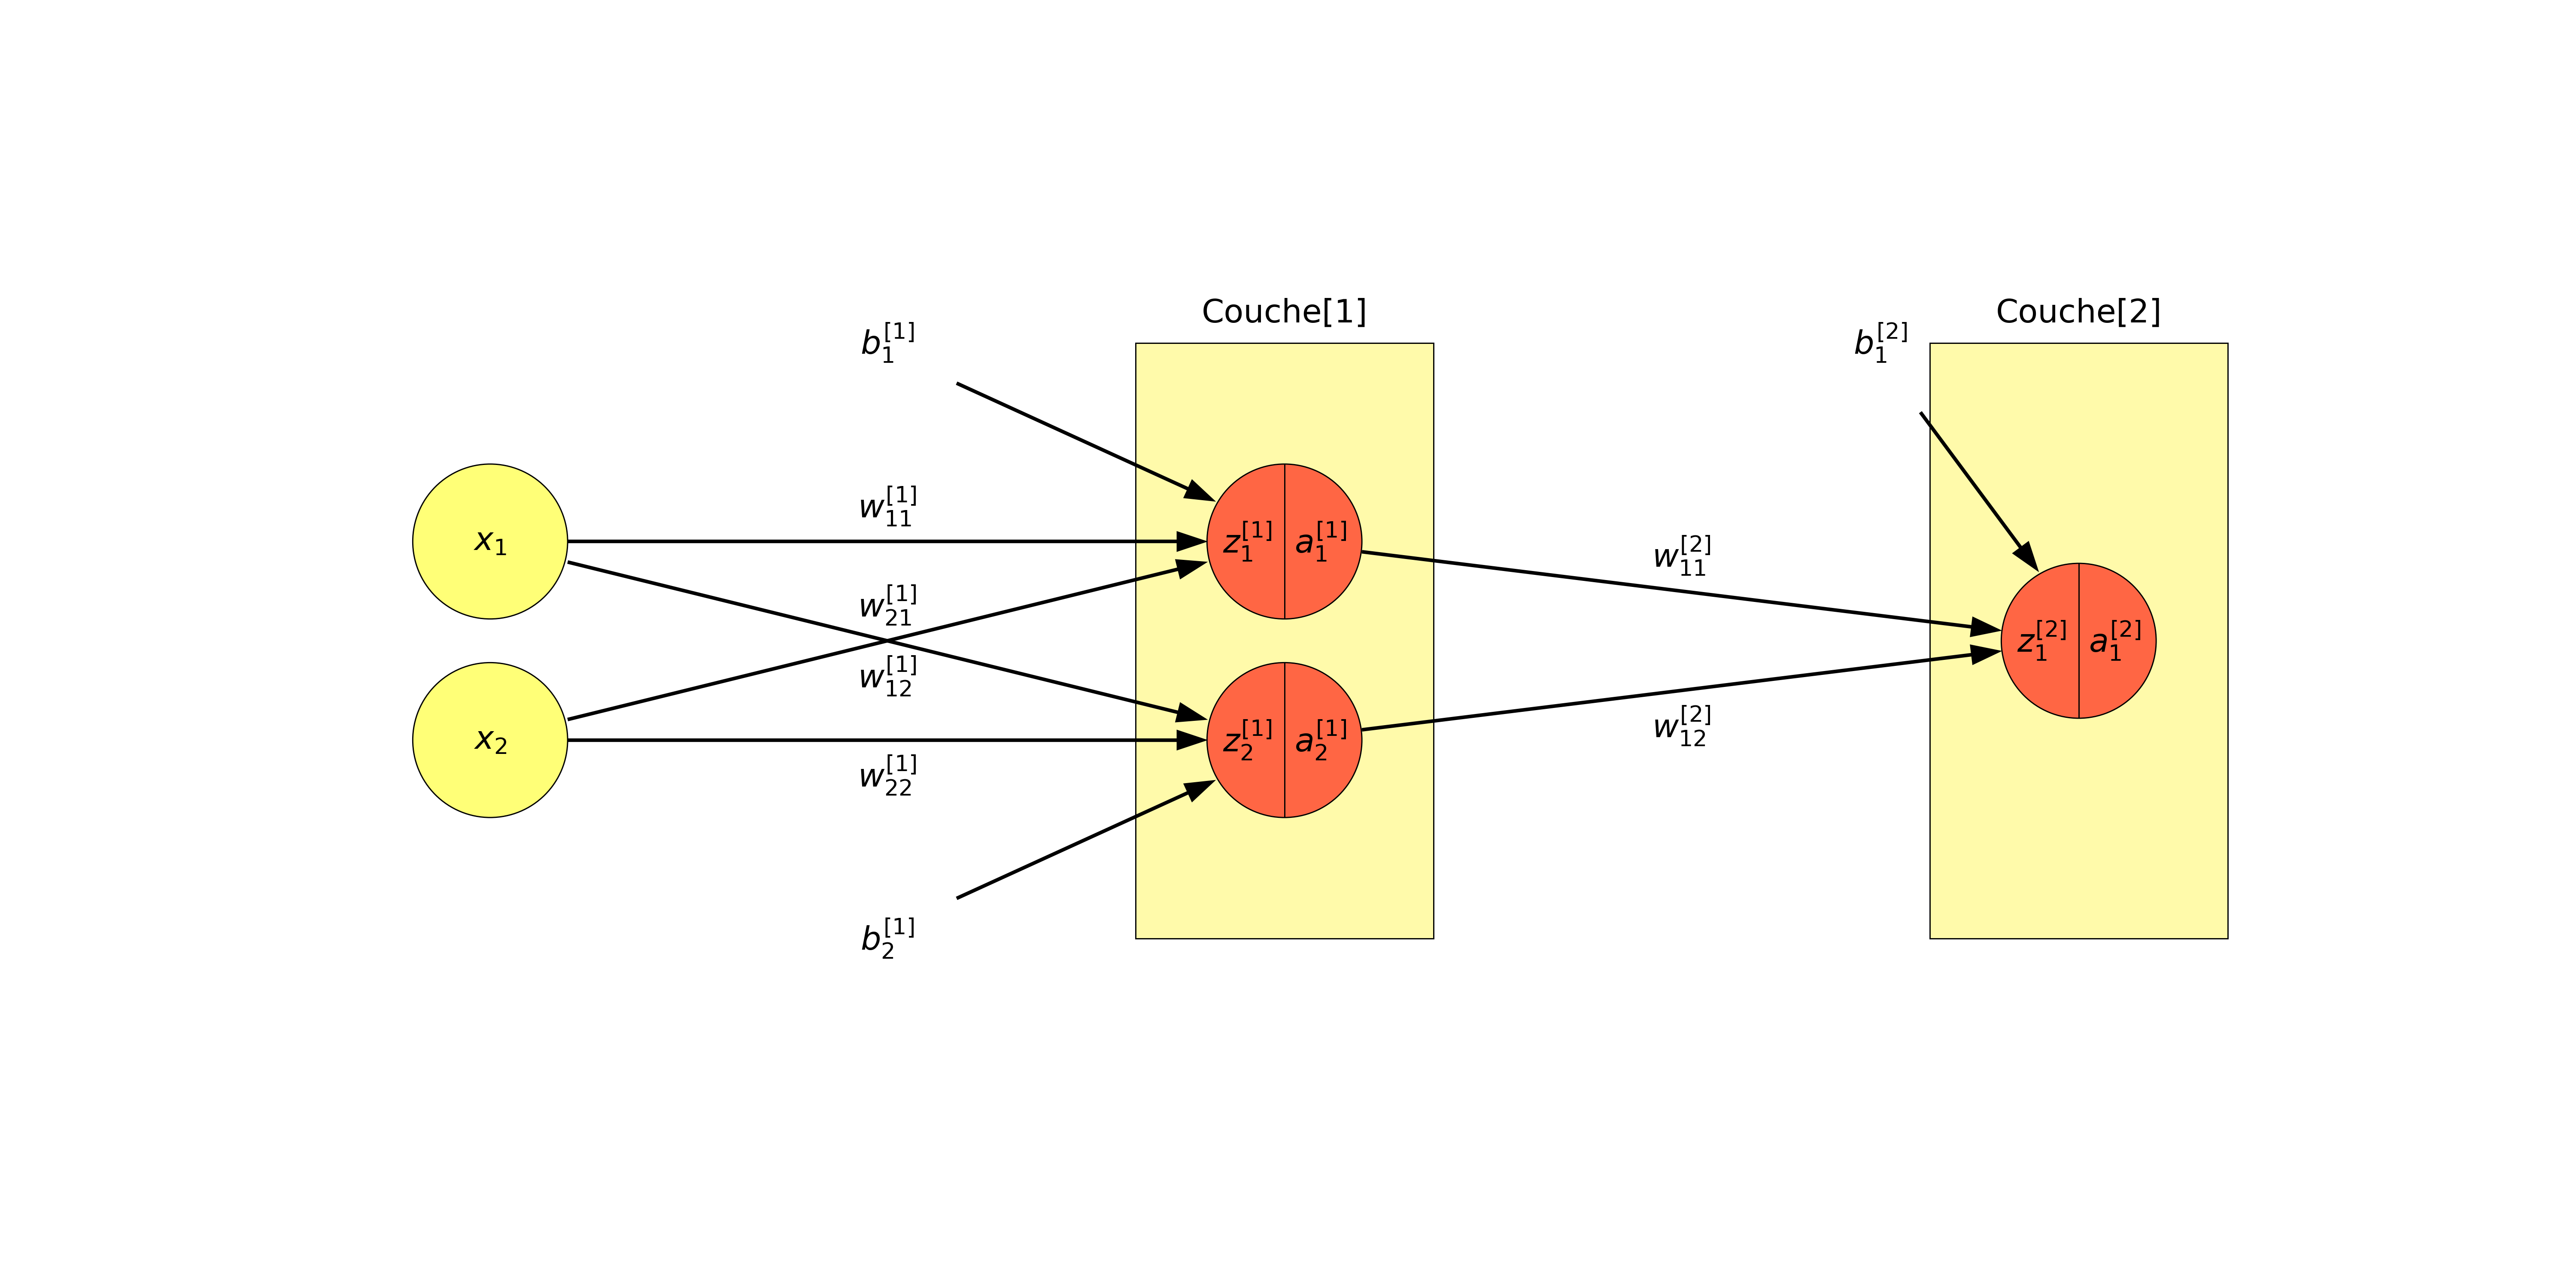

In [3]:
Image(filename='../../Viznet/FeedForward2C.png', width = 1000)

$z^{[2]}_1 = w^{[2]}_{11}a^{[1]}_1 + w^{[2]}_{12}a^{[1]}_2+b^{[2]}_1$  
$a^{[2]}_1 = \frac{1}{1+\exp^{-z^{[2]}_1}}$   

On Peut ajouté autant de couches que l'on souhaites avec autant de neurones que l'on souhaites à l'intérieur. On appelera donc notre réseau un **Deep Neural Network**.
Plus le réseau est profond, plus il est capable d'apprendre des choses compliquées. Mais cela rend aussi l'apprentissage plus long.

**En résumé:**  
1. On note $w_{ij}$ le paramètre associé au neurone $i$ et provenant de l'entrée $j$
2. On note $^{[C]}$ le numéro de la couche $C$ sur laquelle on travaille : $z^{[1]}$, $z^{[2]}$, etc.
3. Pour calculer les valeur $z$ d'une couche $^{[C]}$ on utilise les activations $a$ de la couche $^{[C - 1]}$  
$z^{[2]}_1 = w^{[2]}_{11}a^{[1]}_1 + w^{[2]}_{12}a^{[1]}_2+b^{[2]}_1$  

## Vectorization

$$
\begin{equation*}
\large{
    Z^{[1]} =
    \underbrace{
        \begin{bmatrix}
        x_{1}^{(1)} & x_{2}^{(1)}\\
        x_{1}^{(2)} & x_{2}^{(2)}\\
        \vdots & \vdots\\
        x_{1}^{(m)} & x_{2}^{(m)}
        \end{bmatrix}
    }_{X \in \mathbb{R}^{m \times 2}}\
    \cdot
    \color{orange}{
        \underbrace{
            \begin{bmatrix}
            w_{11}^{[1]} & w_{21}^{[1]}\\
            w_{12}^{[1]} & w_{22}^{[1]}
            \end{bmatrix}
        }_{W^{[1]} \in \mathbb{R}^{2 \times 2}}\
    }
    +
    \color{green}{
        \underbrace{
            \begin{bmatrix}
            b_{1}^{[1]} & \color{teal}{b_{2}^{[1]}}
            \end{bmatrix}
        }_{b^{[1]} \in \mathbb{R}^{1 \times 2}}\
    }
    =
    \underbrace{
        \begin{bmatrix}
        Z_{1}^{[1](1)} & Z_{2}^{[1](1)}\\
        Z_{1}^{[1](2)} & Z_{2}^{[1](2)}\\
        \vdots & \vdots\\
        x_{1}^{(m)} & x_{2}^{(m)}\\
        \end{bmatrix}
    }_{Z^{[1]} \in \mathbb{R}^{m \times 2}}\
}
\end{equation*}
$$

Autre représentation avec un neurone en plus :
$$
\begin{equation*}
\large{
    \color{salmon}{Z^{[1]}} =
    \color{orange}{
        \underbrace{
            \begin{bmatrix}
            w_{11}^{[1]} & w_{12}^{[1]}\\
            w_{21}^{[1]} & w_{22}^{[1]} \\
            w_{31}^{[1]} & w_{32}^{[1]}
            \end{bmatrix}
        }_{W^{[1]} \in \mathbb{R}^{3 \times 2}}\
    }
    \cdot
    \underbrace{
        \begin{bmatrix}
        x_{1}^{(1)} & x_{1}^{(2)} & \dots & x_{1}^{(m)}\\
        x_{2}^{(1)} & x_{2}^{(2)} & \dots & x_{2}^{(m)}
        \end{bmatrix}
    }_{X \in \mathbb{R}^{2 \times m}}\
    +
    \color{green}{
        \underbrace{
            \begin{bmatrix}
            b_{1}^{[1]} \\
            \color{teal}{b_{2}^{[1]}} \\
            \color{red}{b_{3}^{[1]}}
            \end{bmatrix}
        }_{b^{[1]} \in \mathbb{R}^{3 \times 1}}\
    }
    =
    \underbrace{
        \begin{bmatrix}
        Z_{1}^{[1](1)} & Z_{1}^{[1](2)} & \dots & Z_{1}^{[1](m)} \\
        Z_{2}^{[1](1)} & Z_{2}^{[1](2)} & \dots & Z_{2}^{[1](m)} \\
        Z_{3}^{[1](1)} & Z_{3}^{[1](2)} & \dots & Z_{3}^{[1](m)} \\
        \end{bmatrix}
    }_{Z^{[1]} \in \mathbb{R}^{3 \times m}}\
}
\end{equation*}
$$

$$
\begin{equation*}
\large{
    \color{salmon}{Z^{[1]}} =
    W^{[1]}
    \cdot
    X
    +
    b^{[1]}
    =
    \underbrace{
        \begin{bmatrix}
        Z_{1}^{[1](1)} & Z_{1}^{[1](2)} & \dots & Z_{1}^{[1](m)} \\
        Z_{2}^{[1](1)} & Z_{2}^{[1](2)} & \dots & Z_{2}^{[1](m)} \\
        Z_{3}^{[1](1)} & Z_{3}^{[1](2)} & \dots & Z_{3}^{[1](m)} \\
        \end{bmatrix}
    }_{Z^{[1]} \in \mathbb{R}^{3 \times m}}\
}
\end{equation*}
$$

$$
\begin{equation*}
\large{
    \color{deeppink}{A^{[1]}} =
    \frac{1}{1+\exp^{\color{salmon}{-z^{[1]}}}}
    =
    \underbrace{
        \begin{bmatrix}
        a_{1}^{[1](1)} & a_{1}^{[1](2)} & \dots & a_{1}^{[1](m)} \\
        a_{2}^{[1](1)} & a_{2}^{[1](2)} & \dots & a_{2}^{[1](m)} \\
        a_{3}^{[1](1)} & a_{3}^{[1](2)} & \dots & a_{3}^{[1](m)} \\
        \end{bmatrix}
    }_{A^{[1]} \in \mathbb{R}^{3 \times m}}\
}
\end{equation*}
$$

$$
\begin{equation*}
\large{
    \color{darkred}{Z^{[2]}} =
    W^{[2]}
    \cdot
    \color{deeppink}{A^{[1]}}
    +
    b^{[2]} \\
    \\
    W^{[2]} \in \mathbb{R}^{(\color{darkred}{n^{[2]}} \times \color{deeppink}{n^{[1]})}} \\
    \\
    b^{[2]} \in \mathbb{R}^{(\color{darkred}{n^{[2]}} \times 1)} \\
    \\
    \color{deeppink}{n^{[1]}}: \text{nombre de neurones dans la couche} \color{deeppink}{[1]} \\
    \\
    \color{darkred}{n^{[2]}}: \text{nombre de neurones dans la couche} \color{deeppink}{[2]}
}
\end{equation*}
$$


$$
\begin{equation*}
\large{
    \color{darkred}{A^{[2]}} =
    \frac{1}{1+\exp^{\color{darkred}{-z^{[2]}}}} \\
    \\
    \color{green}{Z^{[3]}} = \dots
}
\end{equation*}
$$

On appel ces étapes la **Forward propagation**

## Back Propagation

**Rappel: Entrainement d'un Neurone Artificiel**  
1. Définir une Fonction Coût  
$ \mathcal{L} = -\frac{1}{m}\sum y\log(A)+(1-y)\log(1-A)$  
<span style="color:blue;">Permet d'évaluer les erreurs du modèle.</span>
2. Calculer les dérivées partielles  
$\frac{\partial\mathcal{L}}{\partial W}= \frac{1}{m}X^T\cdot(A-y) \space\space\space\space
\frac{\partial\mathcal{L}}{\partial b} = \frac{1}{m}\sum(A-y)$  
<span style="color:blue;">Permet de comprendre comment la fonction coût évolue par rapport aux différents paramètres $W$ et $b$</span>  
3. Mettre à jour les paramètres $W$ et $b$  
$W = W - \alpha\frac{\partial\mathcal{L}}{\partial W} \space\space\space\space
b = b - \alpha\frac{\partial\mathcal{L}}{\partial b}$  
<span style="color:blue;">Permet de minimiser la fonction coût grâce à la descente de gradients.</span>  

**Entrainement d'un Réseau de Neurones**  
1. Définir une Fonction Coût  
$ \mathcal{L} = -\frac{1}{m}\sum y\log(\color{darkred}{A^{[2]}})+(1-y)\log(1-\color{darkred}{A^{[2]}})$  

2. Calculer les dérivées partielles  
$\frac{\partial\mathcal{L}}{\partial W^{[2]}} = \frac{1}{m}A^{[1]T}\cdot(A^{[2]}-y) \space\space\space\space
\frac{\partial\mathcal{L}}{\partial W^{[1]}} = \frac{1}{m}X^T\cdot(A^{[1]}-y) $  
$\frac{\partial\mathcal{L}}{\partial b^{[2]}} = \frac{1}{m}\sum(A^{[2]}-y)  \space\space\space\space\space\space\space\space\space\space
\frac{\partial\mathcal{L}}{\partial b^{[1]}} = \frac{1}{m}\sum(A^{[1]}-y) $  

3. Mettre à jour les paramètres $W$ et $b$  
$W^{[2]} = W^{[2]} - \alpha\frac{\partial\mathcal{L}}{\partial W^{[2]}} \space\space\space\space\space\space\space\space
W^{[1]} = W^{[1]} - \alpha\frac{\partial\mathcal{L}}{\partial W^{[1]}}$  
$b^{[2]} = b^{[2]} - \alpha\frac{\partial\mathcal{L}}{\partial b^{[2]}} \space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space
b^{[1]} = b^{[1]} - \alpha\frac{\partial\mathcal{L}}{\partial b^{[1]}} $  

**La Back-Propagation**  
Consiste à **retracer** comment la Fonction Coût évolue de la dernière couche du réseau jusqu'à la toute première.

$$\begin{align}
\color{blue}{dZ2=} & ?\\
\\
\frac{\partial\mathcal{L}}{\partial W^{[2]}} = & \color{blue}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}}} \times \color{orange}{\frac{\partial Z^{[2]}}{\partial W^{[2]}}} \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[2]}} = & \color{blue}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}}} \times \frac{\partial Z^{[2]}}{\partial b^{[2]}} \\
\\
\color{green}{dZ1=} & ?\\
\\
\frac{\partial\mathcal{L}}{\partial W^{[1]}} = & \color{green}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}}} \times \color{purple}{\frac{\partial Z^{[1]}}{\partial W^{[1]}}} \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[1]}} = & \color{green}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}}} \times \frac{\partial Z^{[1]}}{\partial b^{[1]}}
\end{align}$$

**Calcule de $dZ2$**
$$\begin{align}
dZ2 = & \frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \\
= & \frac{1}{m}\sum(\frac{-y}{A} + \frac{1-y}{1-A}) \times A(1-A) \\
= & \frac{1}{m}\sum-y(1-A)+(1-y)A \\
= & \frac{1}{m}\sum -y + Ay + A - Ay \\
\color{blue}{dZ2 =} & \color{blue}{\frac{1}{m}\sum A^{[2]} -y} \space \space \space \space \color{blue}{\text{dimension:}(n^{[2]},m)}
\end{align}$$

**Calcule de $dZ1$**
$$\begin{align}
\color{green}{dZ1 =} & \color{blue}{dZ2} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}} \\
= & dZ2 \times W^{[2]} \times A^{[1]}(1-A^{[1]}) \\
\end{align}$$

**Donc:**
$$\begin{align}
\color{blue}{dZ2=} & \color{blue}{A^{[2]} -y}
\space \space \text{dimension:}(n^{[2]},m) \\
\\
\frac{\partial\mathcal{L}}{\partial W^{[2]}} = & \frac{1}{m}\color{blue}{dZ2} \cdot \color{orange}{A^{[1]T}}
\space \space \text{dimension:}(n^{[2]},n^{[1]})
\space \space \color{grey}{\text{La sum est intégré dans le produit matricielle}} \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[2]}} = & \frac{1}{m}\sum_{axe1}\color{blue}{dZ2}
\space \space \space \color{grey}{(\frac{\partial Z^{[2]}}{\partial b^{[2]}} = 1)}
\space \space \text{dimension:}(n^{[2]},1) \\
\\
\color{green}{dZ1=} & W^{[2]T} \cdot \color{blue}{dZ2} \times A^{[1]}(1-A^{[1]})
\space \space \text{dimension:}(n^{[1]},m)\\
\\
\frac{\partial\mathcal{L}}{\partial W^{[1]}} = & \frac{1}{m}\color{green}{dZ1} \cdot \color{purple}{X^T}
\space \space \text{dimension:}(n^{[1]},n^{[0]}) \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[1]}} = & \frac{1}{m}\sum_{axe1}\color{green}{dZ1}
\space \space \space \color{grey}{(\frac{\partial Z^{[1]}}{\partial b^{[1]}} = 1)}
\space \space \text{dimension:}(n^{[1]},1) \\
\end{align}$$
**Remarque**  
$\frac{1}{m}$ Vient du gradient $\mathcal{L}$

# Pratique
$n^{[0]}$: nombre d'entrées du réseau  
$n^{[1]}$: nombre de neurones dans la couche 1  
$n^{[2]}$: nombre de neurones dans la couche 2 (la sortie)  

## Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss
import plotly.graph_objects as go
from tqdm import tqdm

In [47]:
def initialisation(n0, n1, n2):
    # Premiere couche
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    # Seconde couche
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }

    return parameters

In [66]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Premiere couche
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    # Seconde couche
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2,
    }

    return activations

In [67]:
def back_propagation(X, y, activations, parameters):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameters['W2']
    
    m = y.shape[1]
    # Premiere couche
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    # Seconde couche
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2,
    }
    return gradients

In [57]:
def update(gradients, parameters, learning_rate):
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    updated_parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }

    return updated_parameters

In [58]:
def predict(X, parameters, debug=False):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    if debug:
        print(A2)
    return A2 >= 0.5

In [115]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):
    # initialisation W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parameters = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    
    # Boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        # Activations train
        activations = forward_propagation(X_train, parameters)
        # mise à jour
        gradients = back_propagation(X_train, y_train, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)
        
        if i % 10 == 0:
            # Train
            # Calcul du cout train
            train_loss.append(log_loss(y_train, activations['A2']))
            # Calcul de l'accuracy du train
            y_pred = predict(X_train, parameters)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
    
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='Train loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='Train acc')
    plt.legend()
    
    x_min, x_max = X_train[0, :].min() - 0.1, X_train[0, :].max() + 0.1
    y_min, y_max = X_train[1, :].min() - 0.1, X_train[1, :].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
    np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = predict(x_in.T, parameters)
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.subplot(1, 3, 3)
    plt.contourf(xx, yy, y_pred, cmap='copper', alpha=0.25 )
    plt.scatter(X_train[0, :], X_train[1, :], c=y_train, s=40, cmap='copper')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.show()
    
    return parameters

## Dataset

Dimensions de X: (2, 100)
Dimensions de y: (1, 100)


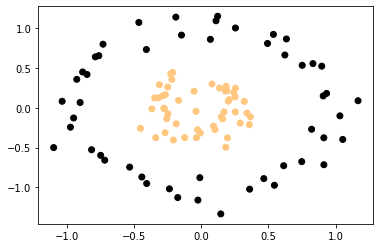

In [116]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('Dimensions de X:', X.shape)
print('Dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='copper')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6546.36it/s]


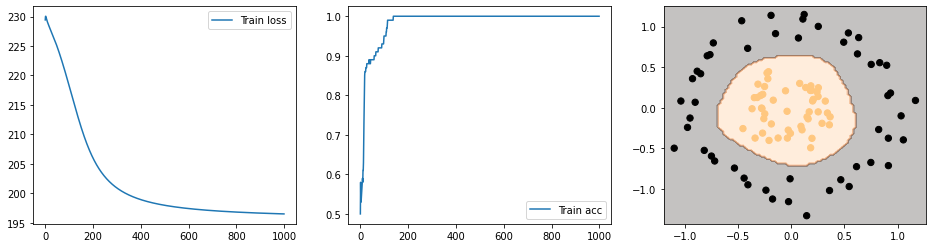

In [126]:
parameters = neural_network(X, y, n1=16, learning_rate = 0.1, n_iter = 10000)

## Cat vs Dog
### Import

In [187]:
from utilities import *

In [188]:
X_train, y_train, X_test, y_test = load_data()

In [189]:
def neural_network2(X_train, y_train, X_test, y_test, n1, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parameters = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    # Boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        # Activations train
        activations = forward_propagation(X_train, parameters)
        # mise à jour
        gradients = back_propagation(X_train, y_train, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)
        
        if i % 10 == 0:
            # Train
            # Calcul du cout train
            train_loss.append(log_loss(y_train, activations['A2']))
            # Calcul de l'accuracy du train
            y_pred = predict(X_train, parameters)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
            ## Test
            # Activations test
            activations_test = forward_propagation(X_test, parameters)
            # Calcul du cout test
            test_loss.append(log_loss(y_test, activations_test['A2']))
            # Calcul de l'accuracy du test
            y_pred = predict(X_test, parameters)
            test_acc.append(accuracy_score(y_test.flatten(), y_pred.flatten()))
    
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='Train loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(test_loss, label='Test loss')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(train_acc, label='Train acc')
    plt.plot(test_acc, label='Test acc')
    plt.legend()
   
    
    plt.show()
    
    print(f"train accuracy : {train_acc[-1]}")
    print(f"test accuracy : {test_acc[-1]}")
    print(test_acc[-1])
    
    return parameters

C:\Users\thiba\.virtualenvs\neural_networks-nOvusaqa\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


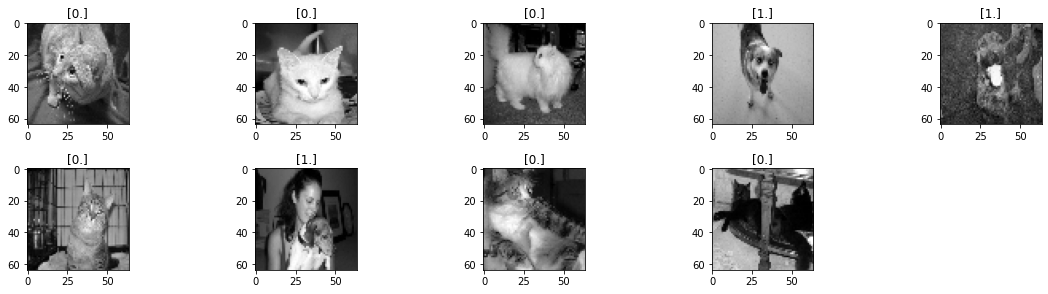

In [190]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [191]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [192]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1,  X_test.shape[-1]) / X_train.max()

m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_test_reshape.shape)
print(X_train_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 80)
(4096, 300)
(1, 300)
(1, 80)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8000/8000 [02:57<00:00, 45.18it/s]


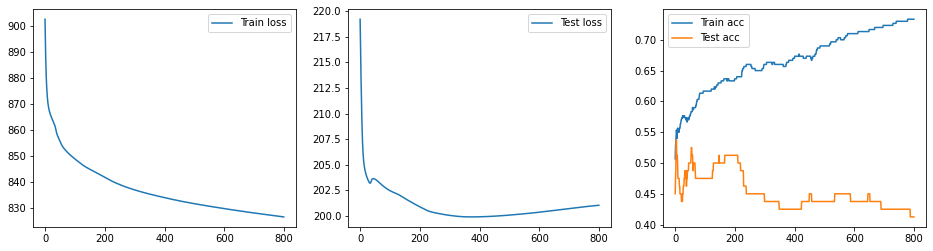

train accuracy : 0.7333333333333333
test accuracy : 0.4125
0.4125


In [193]:
parameters1 = neural_network2(
    X_train_reshape, y_train, X_test_reshape, y_test,
    n1 = 64, learning_rate = 0.01, n_iter = 8000
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:51<00:00, 34.36it/s]


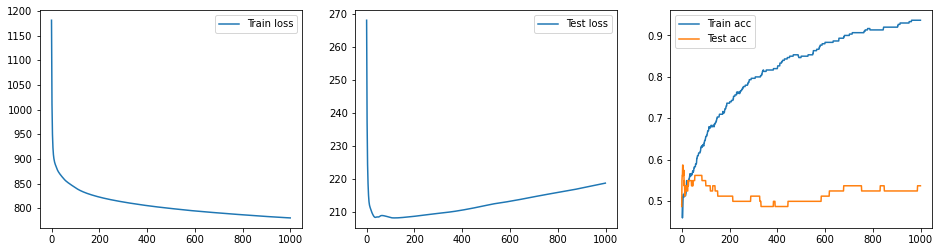

train accuracy : 0.9366666666666666
test accuracy : 0.5375
0.5375


In [196]:
parameters1 = neural_network2(
    X_train_reshape, y_train, X_test_reshape, y_test,
    n1 = 64, learning_rate = 0.01, n_iter = 10000
)